In [265]:
import random
import time
import importlib
import game
importlib.reload(game)
import gameEnvF 
importlib.reload(gameEnvF)
from game import ColorableCliqueGame
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from gameEnvF import draw, triangle_huristic, alphabetaMaxDepth, alphabetaMove, random_move, getPsuedoLegalStates, getLegalStatesAndTag, triangleP0_huristic, triangleSQR_huristic
print(tf.__version__)

colors = [(255,100,100), (100,100,255)]
env = ColorableCliqueGame(300,300,6,colors)

2.8.0


In [210]:
with open('K6D4.npz', 'rb') as f:
    a = np.load(f, allow_pickle=True)['data']

In [211]:
X : np.ndarray = a[:, 0]
Y : np.ndarray = a[:, 1]
Y = Y.astype(np.float32)
Y = np.tanh(Y)
X = np.array(list(X))
print(Y.mean(), Y.var())
print(X.shape, Y.shape)

-0.10843883 0.8265876
(2576722, 16) (2576722,)


In [257]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

rfd3 = joblib.load("./models/rfd3s.joblib")

In [260]:
rfd5 = joblib.load("./models/rfd5s2.joblib")

In [261]:
target_predicted = rfd3.predict(X)
print(mean_squared_error(Y, target_predicted))

0.4631324294512455


In [253]:
target_predicted = rfd5.predict(X)
print(mean_squared_error(Y, target_predicted))

0.43042136213826704


### Test original depth 2 vs depth 3.

1


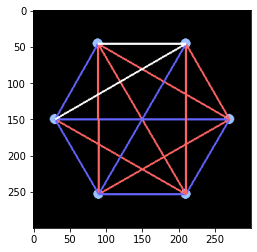

In [27]:
env = ColorableCliqueGame(300,300,6,colors)
def FuncVsFunc(game : ColorableCliqueGame,player1DecisionFunc, player2DecisionFunc):
    while game.winner == -1:
        if game.player == 0:
            player1DecisionFunc(game)
        else:
            player2DecisionFunc(game)


def player1(game):
    alphabetaMove(game, 3, triangle_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 2, triangle_huristic)

random_move(env)
FuncVsFunc(env, player1, player2)
print(env.winner)
draw(env)

### make lots of test...    

In [28]:
def tests(num, player1, player2, random_moves):
    p0wins = 0
    p1wins = 0
    for i in range(num):
        env = ColorableCliqueGame(300,300,6,colors)
        for _ in range(random_moves):
            random_move(env)
        FuncVsFunc(env, player1, player2)
        if env.winner == 0:
            p0wins += 1
        else:
            p1wins += 1
    print("player0 won", p0wins, "| player1 won", p1wins)

In [266]:
def player1(game):
    alphabetaMove(game, 3, triangle_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 3, triangleSQR_huristic)


tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# t1 - t0
# player0 won 48 | player1 won 52
# player0 won 21 | player1 won 79
# player0 won 28 | player1 won 72
# player0 won 43 | player1 won 57

# t1 for p1, and -t0 for p2
# player0 won 82 | player1 won 18
# player0 won 18 | player1 won 82
# player0 won 100 | player1 won 0
# player0 won 27 | player1 won 73

# -t0.
# player0 won 80 | player1 won 20
# player0 won 30 | player1 won 70
# player0 won 100 | player1 won 0
# player0 won 79 | player1 won 21

# t1 - (t0)^2
# player0 won 77 | player1 won 23
# player0 won 32 | player1 won 68
# player0 won 80 | player1 won 20
# player0 won 53 | player1 won 47

player0 won 69 | player1 won 31
player0 won 46 | player1 won 54
player0 won 72 | player1 won 28
player0 won 81 | player1 won 19


In [44]:
def player1(game):
    alphabetaMove(game, 5, triangle_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 3, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# old
# player0 won 63 | player1 won 37

# old 2
# player0 won 61 | player1 won 39
# player0 won 14 | player1 won 86
# player0 won 50 | player1 won 50
# player0 won 15 | player1 won 85

# -t0.
# player0 won 85 | player1 won 15
# player0 won 8 | player1 won 92
# player0 won 90 | player1 won 10

player0 won 72 | player1 won 28
player0 won 32 | player1 won 68
player0 won 91 | player1 won 9
player0 won 69 | player1 won 31


In [267]:
def player1(game):
    alphabetaMove(game, 5, triangle_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 2, triangle_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# OLD
# player0 won 40 | player1 won 10
# player0 won 16 | player1 won 34
# player0 won 28 | player1 won 22
# player0 won 33 | player1 won 17

# Old 2
# player0 won 82 | player1 won 18
# player0 won 22 | player1 won 78

# -p0
# player0 won 85 | player1 won 15
# player0 won 15 | player1 won 85
# player0 won 93 | player1 won 7
# player0 won 8 | player1 won 92

In [47]:
def player1(game):
    alphabetaMove(game, 3, triangleSQR_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 2, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)


# player0 won 33 | player1 won 67
# player0 won 40 | player1 won 60
# player0 won 33 | player1 won 67
# player0 won 60 | player1 won 40

player0 won 77 | player1 won 23
player0 won 19 | player1 won 81
player0 won 32 | player1 won 68
player0 won 0 | player1 won 100


In [48]:
def player1(game):
    alphabetaMove(game, 3, triangleSQR_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 1, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

player0 won 89 | player1 won 11
player0 won 23 | player1 won 77
player0 won 77 | player1 won 23
player0 won 0 | player1 won 100


In [49]:
def player1(game):
    alphabetaMove(game, 2, triangleSQR_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 1, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

player0 won 73 | player1 won 27
player0 won 25 | player1 won 75
player0 won 34 | player1 won 66
player0 won 5 | player1 won 95


In [50]:
def player1(game):
    alphabetaMove(game, 2, triangleSQR_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 0, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

player0 won 78 | player1 won 22
player0 won 26 | player1 won 74
player0 won 46 | player1 won 54
player0 won 7 | player1 won 93


In [51]:
def player1(game):
    alphabetaMove(game, 1, triangleSQR_huristic)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 0, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

player0 won 71 | player1 won 29
player0 won 19 | player1 won 81
player0 won 41 | player1 won 59
player0 won 11 | player1 won 89


### Test RF model vs the huristic model.

In [262]:
def huristic_rfd3(game : ColorableCliqueGame):
    return rfd3.predict([game.state1D()])[0]

def huristic_rfd5(game : ColorableCliqueGame):
    return rfd5.predict([game.state1D()])[0]
# print(huristic_rf(env), alphabetaMaxDepth(env, -99999, 99999, 2, triangle_huristic))
def player1(game):
    alphabetaMove(game, 0, huristic_rfd5)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 0, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# Bif rf, about 350 estimators.
# player0 won 78 | player1 won 22
# player0 won 11 | player1 won 89
# player0 won 100 | player1 won 0
# player0 won 0 | player1 won 100

# small_rf (1m 26 sec), 10 + 3 estinators for 33 runs
# player0 won 62 | player1 won 38
# player0 won 14 | player1 won 86
# player0 won 41 | player1 won 59
# player0 won 21 | player1 won 79

# small_rf, 2 + (2 for 41 runs) estimators. (1m)
# player0 won 72 | player1 won 28
# player0 won 14 | player1 won 86
# player0 won 86 | player1 won 14
# player0 won 27 | player1 won 73

# rfd5
# player0 won 88 | player1 won 12
# player0 won 9 | player1 won 91
# player0 won 61 | player1 won 39
# player0 won 5 | player1 won 95

player0 won 75 | player1 won 25
player0 won 13 | player1 won 87
player0 won 62 | player1 won 38
player0 won 0 | player1 won 100


In [263]:
def huristic_rfd3(game : ColorableCliqueGame):
    return rfd3.predict([game.state1D()])[0]

def huristic_rfd5(game : ColorableCliqueGame):
    return rfd5.predict([game.state1D()])[0]

# print(huristic_rf(env), alphabetaMaxDepth(env, -99999, 99999, 2, triangle_huristic))
def player1(game):
    alphabetaMove(game, 0, huristic_rfd5)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 1, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# 4 min.
# player0 won 81 | player1 won 19
# player0 won 7 | player1 won 93
# player0 won 79 | player1 won 21
# player0 won 6 | player1 won 94

# small_rf (1m 27 sec), 10 + 3 estinators for 33 runs
# player0 won 63 | player1 won 37
# player0 won 18 | player1 won 82
# player0 won 36 | player1 won 64
# player0 won 16 | player1 won 84

# small rf 2*41 estimators
# player0 won 62 | player1 won 38
# player0 won 22 | player1 won 78
# player0 won 78 | player1 won 22
# player0 won 5 | player1 won 95

player0 won 72 | player1 won 28
player0 won 14 | player1 won 86
player0 won 46 | player1 won 54
player0 won 6 | player1 won 94


In [244]:
def huristic_rfd3(game : ColorableCliqueGame):
    return rfd3.predict([game.state1D()])[0]

def huristic_rfd5(game : ColorableCliqueGame):
    return rfd5.predict([game.state1D()])[0]

# print(huristic_rf(env), alphabetaMaxDepth(env, -99999, 99999, 2, triangle_huristic))
def player1(game):
    alphabetaMove(game, 0, huristic_rfd5)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 2, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# player0 won 37 | player1 won 63
# player0 won 14 | player1 won 86
# player0 won 34 | player1 won 66
# player0 won 16 | player1 won 84

player0 won 47 | player1 won 53
player0 won 19 | player1 won 81
player0 won 39 | player1 won 61
player0 won 5 | player1 won 95


In [245]:
def huristic_rfd3(game : ColorableCliqueGame):
    return rfd3.predict([game.state1D()])[0]

def huristic_rfd5(game : ColorableCliqueGame):
    return rfd5.predict([game.state1D()])[0]

# print(huristic_rf(env), alphabetaMaxDepth(env, -99999, 99999, 2, triangle_huristic))
def player1(game):
    alphabetaMove(game, 0, huristic_rfd3)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 3, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)


# player0 won 35 | player1 won 65
# player0 won 31 | player1 won 69
# player0 won 12 | player1 won 88
# player0 won 17 | player1 won 83

player0 won 51 | player1 won 49
player0 won 38 | player1 won 62
player0 won 3 | player1 won 97
player0 won 16 | player1 won 84


In [259]:
def huristic_rfd3(game : ColorableCliqueGame):
    return rfd3.predict([game.state1D()])[0]

def huristic_rfd5(game : ColorableCliqueGame):
    return rfd5.predict([game.state1D()])[0]
# print(huristic_rf(env), alphabetaMaxDepth(env, -99999, 99999, 2, triangle_huristic))
def player1(game):
    alphabetaMove(game, 0, huristic_rfd5)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 0, huristic_rfd3)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)


# rfd5s2 vs rfd3 ( winner rfd3 ) 
# player0 won 20 | player1 won 80
# player0 won 66 | player1 won 34
# player0 won 16 | player1 won 84
# player0 won 66 | player1 won 34

player0 won 37 | player1 won 63
player0 won 59 | player1 won 41
player0 won 48 | player1 won 52
player0 won 58 | player1 won 42


In [233]:
def huristic_rfd3(game : ColorableCliqueGame):
    return rfd3.predict([game.state1D()])[0]

def huristic_rfd5(game : ColorableCliqueGame):
    return rfd5.predict([game.state1D()])[0]

# print(huristic_rf(env), alphabetaMaxDepth(env, -99999, 99999, 2, triangle_huristic))
def player1(game):
    alphabetaMove(game, 1, huristic_rfd3)

def player2(game):
    #print(game.player)
    alphabetaMove(game, 3, triangleSQR_huristic)

tests(100, player1, player2, 2)
tests(100, player2, player1, 2)
tests(100, player1, player2, 1)
tests(100, player2, player1, 1)

# 35 min
# player0 won 67 | player1 won 33
# player0 won 15 | player1 won 85
# player0 won 53 | player1 won 47
# player0 won 31 | player1 won 69

# small estomtaor 10 + 3*33
# player0 won 55 | player1 won 45 ( after 5 min +-)

player0 won 73 | player1 won 27
player0 won 25 | player1 won 75
player0 won 41 | player1 won 59


KeyboardInterrupt: 

In [249]:
env = ColorableCliqueGame(300, 300, 6, colors)

-1


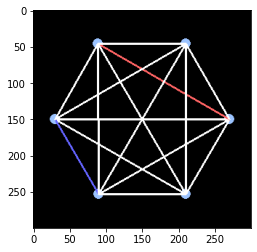

In [219]:
alphabetaMove(env, 1, huristic_rf)
#alphabetaMove(env, 4, triangleSQR_huristic)
print(env.winner)
draw(env)

In [225]:
abs(X[0]).sum()

10